In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv("CabDataset.csv")

In [23]:
data.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [25]:
data.shape

(1156, 7)

There are 1156 rows and 7 columns

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [28]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [32]:
data[data["END_DATE*"].isnull()] #for finding the null values

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [34]:
data.drop(data.index[1155],inplace=True)

In [35]:
data[data.duplicated()] #for finding the duplicate data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [36]:
data.drop_duplicates(inplace=True)

In [37]:
data.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

There is no null value now!


In [39]:
#Lets check if we have the data having start date and end date same with exact same time

data[data["START_DATE*"]==data["END_DATE*"]]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
751,9/6/2016 17:49,9/6/2016 17:49,Business,Unknown Location,Unknown Location,69.1,NaN
761,9/16/2016 7:08,9/16/2016 7:08,Business,Unknown Location,Unknown Location,1.6,NaN
798,10/8/2016 15:03,10/8/2016 15:03,Business,Karachi,Karachi,3.6,NaN
807,10/13/2016 13:02,10/13/2016 13:02,Business,Islamabad,Islamabad,0.7,NaN


In [40]:
#Removing it from the dataset

data.drop(data.index[[751,761,798,807]],inplace=True)

In [41]:
data.shape

(1150, 7)

In [42]:
#Converting START DATE and END DATE to Datetime format

data["START_DATE*"]=pd.to_datetime(data["START_DATE*"])
data["END_DATE*"]=pd.to_datetime(data["END_DATE*"])

c:\users\namita\desktop\nami\jupyter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


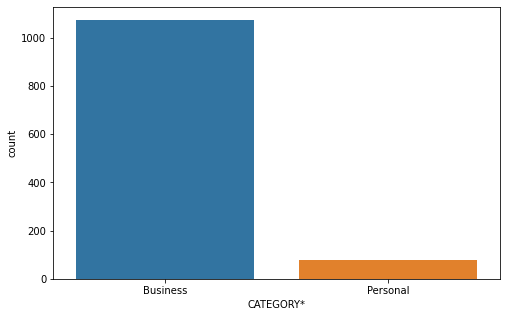

In [44]:
#Plotting Business Vs Personal Trips

plt.figure(figsize=(8,5))
sns.countplot(data["CATEGORY*"])
plt.show()

There are more business trips than personal


In [48]:
#identifying popular destinations(top 10)

data["START*"].value_counts().head(10)

Cary                201
Unknown Location    146
Morrisville          85
Whitebridge          68
Islamabad            56
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START*, dtype: int64

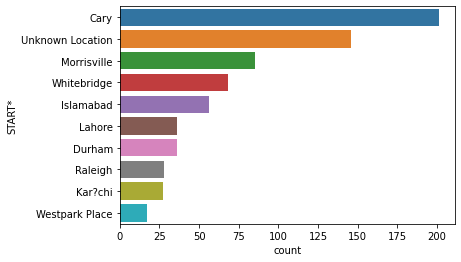

In [52]:
#plotting it accordingly

plt.figure()
sns.countplot(y="START*",order=pd.value_counts(data["START*"]).iloc[:10].index,data=data)
plt.show()


As you can see Cary is the most popular starting point.

In [53]:
#now identifying popular destinations(top 10)

data["STOP*"].value_counts().head(10)


Cary                202
Unknown Location    146
Morrisville          84
Whitebridge          65
Islamabad            57
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP*, dtype: int64

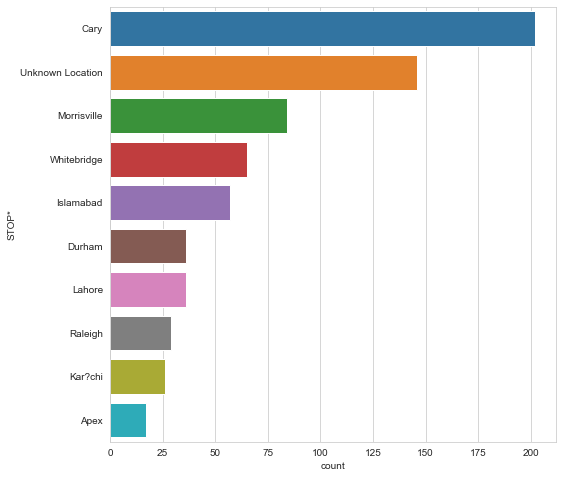

In [77]:
plt.figure(figsize=(8,8))
sns.countplot(y="STOP*",order=pd.value_counts(data["STOP*"]).iloc[:10].index,data=data)
plt.show()


Cary also features in the most popular stop destinations

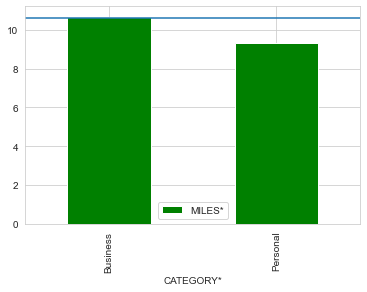

In [73]:
#mean distance travelled per ride for business and personal purposes

data.groupby("CATEGORY*")["MILES*"].mean().plot(kind="bar",color="g")
plt.axhline(data["MILES*"].mean())
plt.legend()

c:\users\namita\desktop\nami\jupyter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PURPOSE*', ylabel='count'>

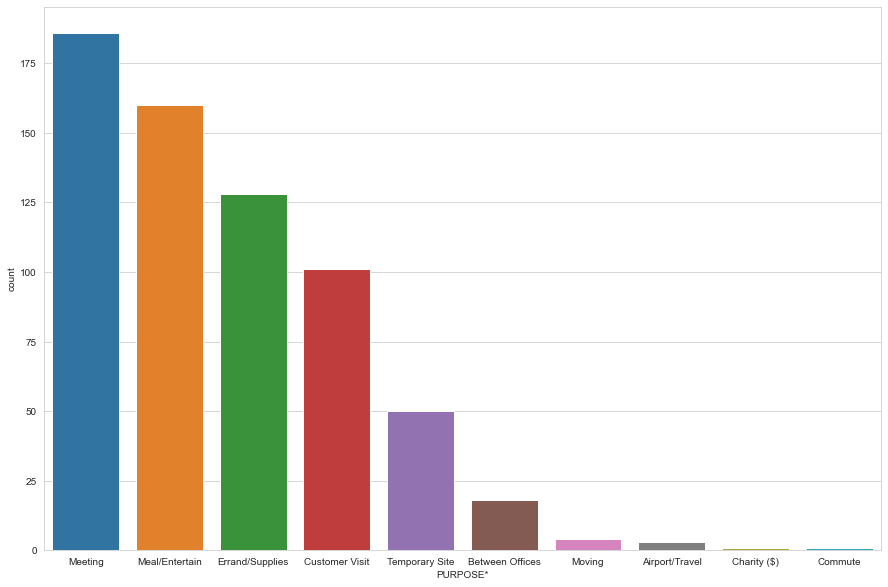

In [75]:
plt.figure(figsize=(15,10))
sns.countplot(data["PURPOSE*"],order=data["PURPOSE*"].value_counts().index)

We can conclude that most of the cabs are taken for meeting purposes
